In [1]:
# import all the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the train dataset
df = pd.read_csv('test.csv')
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [3]:
df.shape

(1459, 80)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
df.info


<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

In [6]:
df['LotFrontage'].isnull().sum()

227

<AxesSubplot: >

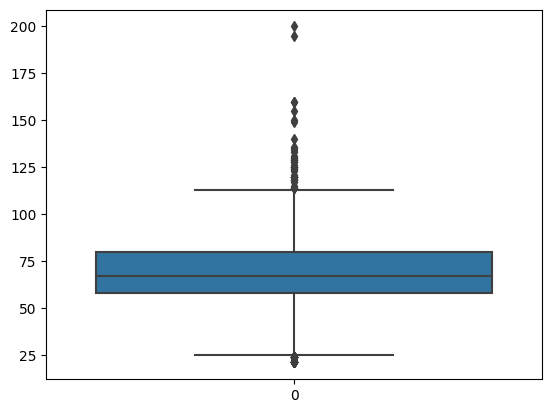

In [7]:
import seaborn as sns
sns.boxplot(df['LotFrontage'])

In [8]:
# As there are lots of outliers in LotFronntage so to fill missing value we are using median instead of mean 
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

In [9]:
df['Alley'].isnull().sum()

1352

In [10]:
df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [11]:
# NA----> No Alley Ascess
df['Alley']=df['Alley'].fillna('NA')

In [12]:
df['Alley'].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [13]:
df['MasVnrType'].unique()


array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [14]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [15]:
df['MasVnrArea'].isnull().sum()

15

<AxesSubplot: >

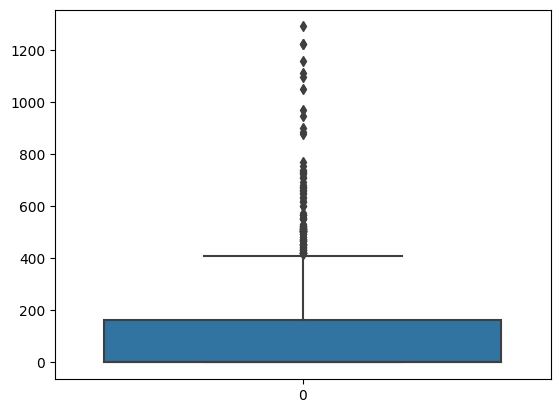

In [16]:
sns.boxplot(df['MasVnrArea'])

In [17]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [18]:
df['BsmtQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', nan], dtype=object)

In [19]:
df['BsmtQual']=df['BsmtQual'].fillna('NA')

In [20]:
df['BsmtQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'NA'], dtype=object)

In [21]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [22]:
df['FireplaceQu']=df['FireplaceQu'].fillna('NA')

In [23]:
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtExposure']=df['BsmtExposure'].fillna('NA')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')

In [24]:
df.GarageType=df['GarageType'].fillna('NA')
df.GarageFinish=df['GarageFinish'].fillna('NA')

In [25]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [26]:
df.GarageCond=df['GarageCond'].fillna('NA')
df.GarageQual=df['GarageQual'].fillna('NA')

In [27]:
df.PoolQC=df['PoolQC'].fillna('NA')
df.Fence=df['Fence'].fillna('NA')
df.MiscFeature=df['MiscFeature'].fillna('NA')

In [28]:
df.isnull().sum().sum()

22

In [29]:
X=df.select_dtypes(include='number')

In [33]:
Y=df.select_dtypes(include='object')

In [34]:
Z=pd.get_dummies(Y)

In [35]:
X=pd.concat([X,Z],axis=1)

In [37]:
P=df['YrSold']

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [39]:
lr.fit(X,P)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [40]:
lr.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [48]:
pred=lr.predict(X)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
lr.score(X,P)

In [ ]:
from sklearn.metrics import r2_score
accuracy=r2_score(P,pred)

In [ ]:
accuracy